In [27]:
%matplotlib notebook

In [28]:
import numpy as np
from mayavi import mlab
from matplotlib import pyplot as plt
import ipywidgets as widgets

In [32]:
from combine.philip_zb_w7xt_version2 import gen_grid
from matplotlib import cm, scale, pyplot as plt
import ipywidgets as widgets
import numpy as np

from combine.quick_g import multi_bump, widget_g_plot
import combine.grid_analyze_version4 as ga

(10, 0.0, 0.0, 1, False)
[21. 73.  5.  0.  0.  1.  4.]
File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)


<IPython.core.display.Javascript object>


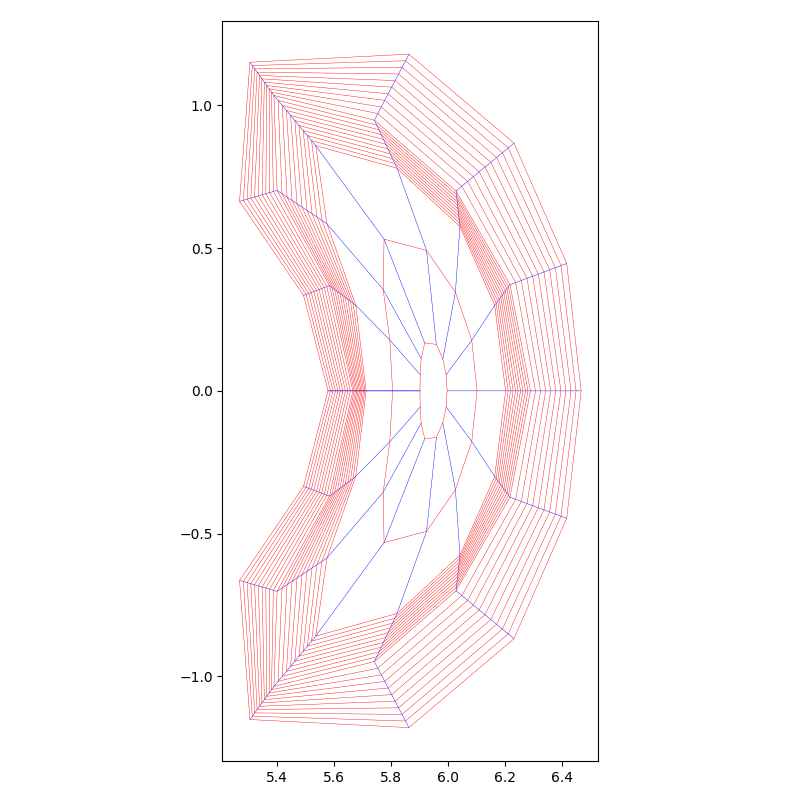

interactive(children=(IntSlider(value=0, description='phi', max=36), Output()), _dom_classes=('widget-interact…

In [36]:
consts = {
    # in -> outside cell numbers (sum is redial resolution)
    "NirC": 3, "NirS": 10, "NirN": 10,
    # half(-1/2) poloidal and toroidal cell number (per half-module)
    # niphalf >20
    "Niphalf": 7, "Nit": 37, "full_torus": False,
    # poloidal grid spacing and smoothing options implemented by phg
    "eq_space": True, 
    "eq_space_vessel": False, 
    "zoidpol": False,
    "normal_vessel": True, 
    "normal_smooth": 0,
    # strating angle in [0,Nit[ and offset list of projection center
    "trace_index": 0, 
    "center_delta_R": .02, # [0,0,0,0.2,.15],
    # path to magnetic field file
    "magnetic_field_file": "./Fields/Field-EIM-high.dat", # ErrFullT-
    "configuration": "EIM",
}

g = gen_grid(consts)
widget_g_plot(g) 
np.savez("minimal_grid", data=g)

In [29]:
g = np.load("minimal_grid.npz")["data"]
xyzg = np.empty_like(g)
xyzg[:,:,:,0] = g[:,:,:,0] * np.cos(g[:,:,:,2])
xyzg[:,:,:,1] = g[:,:,:,0] * np.sin(g[:,:,:,2])
xyzg[:,:,:,2] = g[:,:,:,1]

In [23]:
sub_gs = [sg.transpose(2,0,1) for sg in xyzg]

In [26]:
for sub_g in sub_gs:
    mlab.mesh(*sub_g)
mlab.show()

<IPython.core.display.Javascript object>


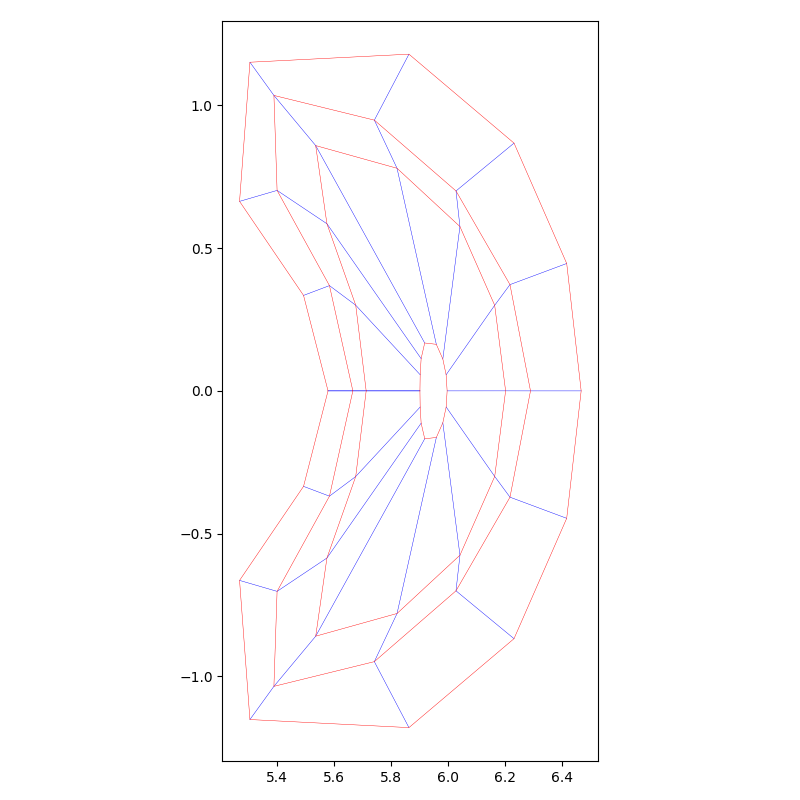

interactive(children=(IntSlider(value=0, description='phi', max=36), Output()), _dom_classes=('widget-interact…

In [31]:
widget_g_plot(g)

In [ ]:
g